# Unsupervised learning

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# import data 
data = pd.read_csv('spinem.csv')
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [4]:
f1 = data['pelvic_incidence'].values
f1

array([ 63.0278175 ,  39.05695098,  68.83202098,  69.29700807,
        49.71285934,  40.25019968,  53.43292815,  45.36675362,
        43.79019026,  36.68635286,  49.70660953,  31.23238734,
        48.91555137,  53.5721702 ,  57.30022656,  44.31890674,
        63.83498162,  31.27601184,  38.69791243,  41.72996308,
        43.92283983,  54.91944259,  63.07361096,  45.54078988,
        36.12568347,  54.12492019,  26.14792141,  43.58096394,
        44.5510115 ,  66.87921138,  50.81926781,  46.39026008,
        44.93667457,  38.66325708,  59.59554032,  31.48421834,
        32.09098679,  35.70345781,  55.84328595,  52.41938511,
        35.49244617,  46.44207842,  53.85479842,  66.28539377,
        56.03021778,  50.91244034,  48.332638  ,  41.35250407,
        40.55735663,  41.76773173,  55.28585178,  74.43359316,
        50.20966979,  30.14993632,  41.17167989,  47.65772963,
        43.34960621,  46.85578065,  43.20318499,  48.10923638,
        74.37767772,  89.68056731,  44.529051  ,  77.69

In [5]:
f2 = data['pelvic_radius'].values
f3 = data['pelvic_slope'].values

In [7]:
x = np.array(list(zip(f1,f2,f3)))
x


array([[6.30278175e+01, 9.86729167e+01, 7.44503464e-01],
       [3.90569510e+01, 1.14405425e+02, 4.15185678e-01],
       [6.88320210e+01, 1.05985135e+02, 4.74889164e-01],
       [6.92970081e+01, 1.01868495e+02, 3.69345264e-01],
       [4.97128593e+01, 1.08168725e+02, 5.43360472e-01],
       [4.02501997e+01, 1.30327871e+02, 7.89992856e-01],
       [5.34329282e+01, 1.20567523e+02, 1.98919573e-01],
       [4.53667536e+01, 1.17270067e+02, 1.31972555e-01],
       [4.37901903e+01, 1.25002893e+02, 1.90407626e-01],
       [3.66863529e+01, 8.42414152e+01, 3.67700139e-01],
       [4.97066095e+01, 1.08648265e+02, 6.88009500e-01],
       [3.12323873e+01, 1.20055399e+02, 6.08342758e-01],
       [4.89155514e+01, 1.19321358e+02, 1.39478165e-01],
       [5.35721702e+01, 1.10966698e+02, 8.19309930e-02],
       [5.73002266e+01, 1.16806587e+02, 4.16721511e-01],
       [4.43189067e+01, 1.24115836e+02, 6.64040876e-01],
       [6.38349816e+01, 1.12309491e+02, 5.60675371e-01],
       [3.12760118e+01, 1.29011

In [9]:
kmeans = KMeans(n_clusters=3,random_state=123)

In [10]:
model = kmeans.fit(x)

In [16]:
cluster_labels = kmeans.predict(x)
cluster_labels

array([1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,

In [13]:
C = kmeans.cluster_centers_
C

array([[ 80.37610421, 119.73426501,   0.49497729],
       [ 61.46901494, 105.1307429 ,   0.46450602],
       [ 45.62446474, 125.18262908,   0.46291274]])

In [17]:
sil = silhouette_score(x,cluster_labels,metric='euclidean',sample_size=len(data))
print(C)
print(sil)


[[ 80.37610421 119.73426501   0.49497729]
 [ 61.46901494 105.1307429    0.46450602]
 [ 45.62446474 125.18262908   0.46291274]]
0.3609119207610946


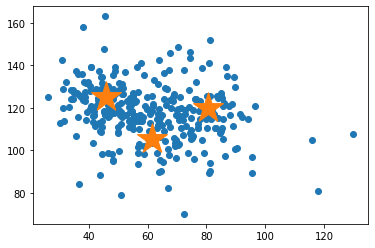

In [19]:
#  For 2-D plot of the data points along with the centroids 
fig = plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.scatter(C[:,0],C[:,1],marker='*',s=1000)

C:\Users\ANZAR AZIZ\AppData\Local\Temp\ipykernel_11436\2397665276.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 2 with shape (6,).

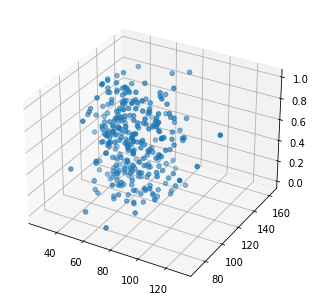

In [20]:
# For 3-D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1],x[:,2])
ax.scatter(C[:,0],C[:,1],C[:2],marker='*',c='#050505',s=1000)